<a href="https://colab.research.google.com/github/avner8943/ml/blob/master/RNN_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import copy
import numpy as np

import matplotlib.pyplot as plt


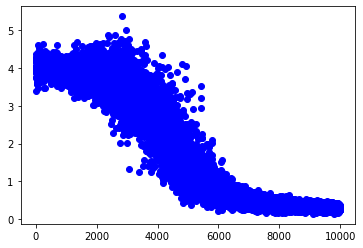

In [3]:
 # sigmoid
def sig(x):

  return 1/(1+np.exp(-x))

def der_sig(x):

  return x*(1-x)


bin_len = 8 # 8 digits for each int

# list for saving binary repsetantion of int
bin_arr = np.unpackbits(np.array([range(2**bin_len)], dtype=np.uint8).T,axis=1)

lr = 0.1 # learnning rate

# layers dimenions
in_dim =2
h_dim = 16 # 
out_dim = 1


# initialize
w_xh = 2*np.random.random((in_dim,h_dim)) - 1
w_yh = 2*np.random.random((h_dim,out_dim)) - 1
w_hh = 2*np.random.random((h_dim,h_dim)) - 1



# trainning loop
iters = 10000


# divide by two for the sum won't be 
# more then maximum integer
max_int = 2**bin_len/2  

# array to hold errors
errors = []

for i in range(iters):


  # net inputs
  int_1 = np.random.randint(max_int)
  int_1b = bin_arr[int_1]

  int_2 = np.random.randint(max_int)
  int_2b = bin_arr[int_2]

  sum_int = int_1+int_2
  sum_intb = bin_arr[sum_int]


  # flip binarry so we can loop 
  # from backword
  int_1b_r = int_1b[::-1]
  int_2b_r = int_2b[::-1]
  sum_intb_r = sum_intb[::-1]

  # arrays to hold data for loops
  out_der = [] # derivative of output layer
  h_array = [] # array to hold hiddens layers
  h_t_old = np.zeros(h_dim) 
  
  over_all_err = 0

  for bin in range(bin_len):

    x = np.array([int_1b_r[bin],int_2b_r[bin]])
    y = sum_intb_r[bin].reshape((1,1))

    # calculate hidden layer
    h_t = sig(np.dot(h_t_old, w_hh)+np.dot(x,w_xh))
    h_array.append(h_t)

    y_pred = sig(np.dot(h_t,w_yh))

    err = y - y_pred

    over_all_err += np.abs(err[0])

    out_der.append(err*der_sig(y_pred))

    h_t_old = h_t

  # now starting to backpropagate
  next_h_delta = np.zeros(h_dim)

  # flipping arrays so we can back propegate
  h_array = h_array[::-1]
  h_array.append(np.zeros(h_dim))
  out_der = out_der[::-1]


  for bin in range(bin_len):

    x = np.array([int_1b[bin], int_2b[bin]]).reshape((1,2))
    h_t = h_array[bin].reshape((1,h_dim))
    h_t_old  = h_array[bin+1].reshape((1,h_dim))

    out_delta = out_der[bin]


    h_delta = (next_h_delta.dot(w_hh.T)+ out_delta.dot(w_yh.T))* der_sig(h_t)

    # updating weights
    w_yh += lr*(h_t.T.dot(out_delta))
    w_hh += lr*(h_t_old.T.dot(h_delta))
    w_xh += lr*(x.T.dot(h_delta))

    next_h_delta = h_delta

  errors.append(over_all_err)
  
# plot error over iters
plt.plot(list(range(len(errors))), errors,  'bo')
plt.show()




In [ ]:
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(
    np.array([range(largest_number)],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = binary[i]

print(len(int2binary))

256
